# [ New York City Airbnb Prices - Group 19]

#### Group Members:


İpek Nur Dolu - 27893

Akmerey Kadyrzhanova - 28606

# MACHINE LEARNING


In the third step of our project we used the manipulated data set we used in the previous parts. 

In this step, we used different models to

In [1]:
#First we import the libraries that are needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import reverse_geocoder as rg
from geopy.distance import geodesic
from scipy import stats
import seaborn as sns
from os.path import join
from os import listdir
from scipy.stats import f_oneway

import warnings
warnings.filterwarnings("ignore")

import datetime
import statsmodels.api as sm

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
#Reading the manipulated data from the first step of our project.
dfM = pd.read_csv('tmp_main_data_with_prox_crime.csv')

In [3]:
#Our manipulated data:

dfM

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_subway,nearest_subway,long_nearest_subway,latitude_nearest_subway,number_aoi_df,nearest_aoi_df,long_nearest_aoi_df,latitude_nearest_aoi_df,n_of_crime
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,11.0,393.447551,-73.975776,40.650782,3.0,560.638794,-73.969087,40.661251,46511
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,35.0,93.263136,-73.984591,40.754184,4.0,258.915235,-73.981794,40.758021,40136
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,17.0,204.436840,-73.940770,40.814229,1.0,192.572103,-73.942680,40.803460,40136
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,14.0,118.486794,-73.959990,40.688889,1.0,851.219144,-73.966125,40.669937,46511
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,13.0,111.622098,-73.944250,40.795020,1.0,211.494984,-73.942680,40.803460,40136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,17.0,79.322475,-73.950426,40.680438,0.0,NaN,NaN,NaN,46511
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,8.0,133.273731,-73.933147,40.706152,0.0,NaN,NaN,NaN,46511
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,17.0,159.827727,-73.947535,40.817906,1.0,753.940988,-73.942680,40.803460,40136
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,30.0,154.702322,-73.989735,40.757308,2.0,582.245970,-73.988067,40.742181,40136


In [4]:
# Types in our data:

dfM.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_subway                     float64
nearest_subway                    float64
long_nearest_subway               float64
latitude_nearest_subway           float64
number_aoi_df                     float64
nearest_aoi_df                    float64
long_nearest_aoi_df               float64
latitude_nearest_aoi_df           

In [5]:
#Now we are looking into our data and observe empty places.
dfM.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
number_subway                         0
nearest_subway                     1309
long_nearest_subway                1309
latitude_nearest_subway            1309
number_aoi_df                         0
nearest_aoi_df                    18316
long_nearest_aoi_df               18316
latitude_nearest_aoi_df           18316
n_of_crime                            0


In [6]:
dfM['name'].fillna(dfM['name'].mode()[0], inplace=True)
dfM['host_name'].fillna(dfM['host_name'].mode()[0], inplace=True)
dfM['last_review'].fillna(dfM['last_review'].mode()[0], inplace=True)
dfM['reviews_per_month'].fillna(dfM['reviews_per_month'].mode()[0], inplace=True)
dfM['nearest_subway'].fillna(dfM['nearest_subway'].mode()[0], inplace=True)
dfM['long_nearest_subway'].fillna(dfM['long_nearest_subway'].mode()[0], inplace=True)
dfM['latitude_nearest_subway'].fillna(dfM['latitude_nearest_subway'].mode()[0], inplace=True)
dfM['nearest_aoi_df'].fillna(dfM['nearest_aoi_df'].mode()[0], inplace=True)
dfM['long_nearest_aoi_df'].fillna(dfM['long_nearest_aoi_df'].mode()[0], inplace=True)
dfM['latitude_nearest_aoi_df'].fillna(dfM['latitude_nearest_aoi_df'].mode()[0], inplace=True)

In [7]:
dfM.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_subway                     0
nearest_subway                    0
long_nearest_subway               0
latitude_nearest_subway           0
number_aoi_df                     0
nearest_aoi_df                    0
long_nearest_aoi_df               0
latitude_nearest_aoi_df           0
n_of_crime                        0
dtype: int64

In [8]:
dfM.drop(['id', 'name', 'host_id', 'host_name', 'calculated_host_listings_count', 'latitude', 'longitude', 'long_nearest_subway', 'latitude_nearest_subway', 'latitude_nearest_aoi_df', 'long_nearest_aoi_df', 'last_review', 'neighbourhood_group','neighbourhood'], axis=1, inplace=True)
dfM.dropna(inplace=True)
dfM

,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_subway,nearest_subway,number_aoi_df,nearest_aoi_df,n_of_crime
0,Private room,149,1,9,0.21,365,11.0,393.447551,3.0,560.638794,46511
1,Entire home/apt,225,1,45,0.38,355,35.0,93.263136,4.0,258.915235,40136
2,Private room,150,3,0,0.02,365,17.0,204.436840,1.0,192.572103,40136
3,Entire home/apt,89,1,270,4.64,194,14.0,118.486794,1.0,851.219144,46511
4,Entire home/apt,80,10,9,0.10,0,13.0,111.622098,1.0,211.494984,40136
...,...,...,...,...,...,...,...,...,...,...,...
48890,Private room,70,2,0,0.02,9,17.0,79.322475,0.0,313.884476,46511
48891,Private room,40,4,0,0.02,36,8.0,133.273731,0.0,313.884476,46511
48892,Entire home/apt,115,10,0,0.02,27,17.0,159.827727,1.0,753.940988,40136
48893,Shared room,55,1,0,0.02,2,30.0,154.702322,2.0,582.245970,40136


## Price prediction with various regression models

### Linear Regression

In [11]:
variables = ['number_subway', 'number_aoi_df', 'n_of_crime', 'minimum_nights', 'nearest_subway', 'nearest_aoi_df' ]

In [12]:
dfM = pd.get_dummies(dfM, columns=['room_type'])
dfM.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_subway,nearest_subway,number_aoi_df,nearest_aoi_df,n_of_crime,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,149,1,9,0.21,365,11.0,393.447551,3.0,560.638794,46511,0,1,0
1,225,1,45,0.38,355,35.0,93.263136,4.0,258.915235,40136,1,0,0
2,150,3,0,0.02,365,17.0,204.436840,1.0,192.572103,40136,0,1,0
3,89,1,270,4.64,194,14.0,118.486794,1.0,851.219144,46511,1,0,0
4,80,10,9,0.10,0,13.0,111.622098,1.0,211.494984,40136,1,0,0


Here we tried to observe the affect of the features on price. To get a better understanding we first tried to see it room by room.

In [14]:
#Entire home/apt model
f = dfM.loc[dfM['room_type_Entire home/apt'] == 1, :]
f_data = f.copy()
model = sm.OLS(f_data['price'], sm.add_constant(f_data.loc[:, variables]))
f_results = model.fit()
f_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     89.26
Date:                Sat, 29 May 2021   Prob (F-statistic):          2.85e-111
Time:                        09:55:44   Log-Likelihood:            -1.7933e+05
No. Observations:               25409   AIC:                         3.587e+05
Df Residuals:                   25402   BIC:                         3.587e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            134.4977     10.771     12.487      0.000     113.386     155.610
number_subway      4.1972      0.206     20.376      0.000       3.793       4.601
number_aoi_df     -2.4344      2.038     -1.195      0.232      -6.428       1.559
n_of_crime        -0.0002      0.000     -0.740      0.460      -0.001       0.000
minimum_nights     0.0516      0.077      0.669      0.503      -0.099       0.203
nearest_subway     0.0434      0.013      3.287      0.001       0.018       0.069
nearest_aoi_df     0.0082      0.008      1.012      0.311      -0.008       0.024
==============================================================================
Omnibus:                    51447.825   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        194268043.103
Skew:                          16.787   Prob(JB):                         0.00
Kurtosis:                     430.046   Cond. No.                     2.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
#Private room model
f = dfM.loc[dfM['room_type_Private room'] == 1, :]
f_data = f.copy()
model = sm.OLS(f_data['price'], sm.add_constant(f_data.loc[:, variables]))
f_results = model.fit()
f_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     76.15
Date:                Sat, 29 May 2021   Prob (F-statistic):           1.57e-94
Time:                        09:55:46   Log-Likelihood:            -1.4479e+05
No. Observations:               22326   AIC:                         2.896e+05
Df Residuals:                   22319   BIC:                         2.896e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             64.5064      5.506     11.716      0.000      53.715      75.298
number_subway      2.3875      0.145     16.506      0.000       2.104       2.671
number_aoi_df      1.0262      1.429      0.718      0.473      -1.774       3.826
n_of_crime        -0.0003      0.000     -2.636      0.008      -0.001   -7.53e-05
minimum_nights     0.5860      0.065      8.991      0.000       0.458       0.714
nearest_subway     0.0146      0.008      1.881      0.060      -0.001       0.030
nearest_aoi_df    -0.0052      0.005     -1.069      0.285      -0.015       0.004
==============================================================================
Omnibus:                    61293.388   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2909023385.467
Skew:                          34.570   Prob(JB):                         0.00
Kurtosis:                    1770.020   Cond. No.                     2.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#Shared room model
f = dfM.loc[dfM['room_type_Shared room'] == 1, :]
f_data = f.copy()
model = sm.OLS(f_data['price'], sm.add_constant(f_data.loc[:, variables]))
f_results = model.fit()
f_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     5.144
Date:                Sat, 29 May 2021   Prob (F-statistic):           3.14e-05
Time:                        09:55:48   Log-Likelihood:                -6992.0
No. Observations:                1160   AIC:                         1.400e+04
Df Residuals:                    1153   BIC:                         1.403e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             84.9189     15.027      5.651      0.000      55.436     114.402
number_subway      1.7280      0.437      3.956      0.000       0.871       2.585
number_aoi_df      0.7030      3.699      0.190      0.849      -6.554       7.960
n_of_crime        -0.0008      0.000     -2.694      0.007      -0.001      -0.000
minimum_nights    -0.0696      0.095     -0.733      0.463      -0.256       0.117
nearest_subway     0.0128      0.024      0.543      0.587      -0.033       0.059
nearest_aoi_df    -0.0190      0.013     -1.414      0.157      -0.045       0.007
==============================================================================
Omnibus:                     1742.718   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           604378.211
Skew:                           8.832   Prob(JB):                         0.00
Kurtosis:                     113.419   Cond. No.                     2.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For all room types we can observe that R-squared value is around 2% which indicates that only 2% of our data is suitable for Linear Regression model. That's why, this type of model is not useful.


### Decision Tree

We used two models for Decision Tree: Naive Model and Param Model. 


In [377]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [374]:
featuresM = dfM.drop(['price'], axis=1)
targetM = dfM[['price']]

In [375]:
def train_and_predict(model, features, target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("accuracy score: %.2f" % accuracy_score(y_test, y_pred))
    (tn, fp, fn, tp) = confusion_matrix(y_test, y_pred).ravel()
    print("confusion matrix")
    print("tn, fp, fn, tp")
    print(tn, fp, fn, tp)

In [378]:
# Naive Model

train_and_predict(naive_model, featuresM, targetM)

accuracy score: 0.05


ValueError: too many values to unpack (expected 4)

In [379]:
# Param Model

train_and_predict(param_model, featuresM, targetM)

accuracy score: 0.07


ValueError: too many values to unpack (expected 4)

While we got higher score with Param Model, it is still really low. 

### Random Forest

After trying two models and getting low accuracy scores we wanted to observe it with Random Forest too.

In [380]:
from sklearn.ensemble import RandomForestClassifier

In [381]:
tree = RandomForestClassifier()
model = tree.fit(xtr, ytr)

In [382]:
pred = model.predict(xte)

In [383]:
pred

array(['b. 51-100', 'e. 201-300', 'c. 101-150', ..., 'd. 151-200',
       'd. 151-200', 'b. 51-100'], dtype=object)

In [384]:
print("Real Values: ", str(yte.values))
print("Estimated Values", str(pred))

Real Values:  [['b. 51-100']
 ['d. 151-200']
 ['b. 51-100']
 ...
 ['c. 101-150']
 ['b. 51-100']
 ['b. 51-100']]
Estimated Values ['b. 51-100' 'e. 201-300' 'c. 101-150' ... 'd. 151-200' 'd. 151-200'
 'b. 51-100']


In [386]:
print("Error: ", str(np.mean(yte.values!=pred)))

Error:  0.7605817811469763


In [388]:
print(accuracy_score(yte, pred))

0.3869043959422072


With Random Forest we got much higher accuracy, 38%. So we can say that Random Forest is much more accurate than Decision Tree models and Linear Regression Models while observing the price.

Then we wanted to improve our accuracy more so we worked on our data as a whole without removing any features to see the whole data's affect and to compare the difference in accuracy with only couple of the features.

In [544]:
dfM1 = pd.read_csv('tmp_main_data_with_prox_crime.csv')


In [545]:
dfM1.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
number_subway                         0
nearest_subway                     1309
long_nearest_subway                1309
latitude_nearest_subway            1309
number_aoi_df                         0
nearest_aoi_df                    18316
long_nearest_aoi_df               18316
latitude_nearest_aoi_df           18316
n_of_crime                            0


In [546]:
dfM1['name'].fillna(dfM1['name'].mode()[0], inplace=True)
dfM1['host_name'].fillna(dfM1['host_name'].mode()[0], inplace=True)
dfM1['last_review'].fillna(dfM1['last_review'].mode()[0], inplace=True)
dfM1['reviews_per_month'].fillna(dfM1['reviews_per_month'].mode()[0], inplace=True)
dfM1['nearest_subway'].fillna(dfM1['nearest_subway'].mode()[0], inplace=True)
dfM1['long_nearest_subway'].fillna(dfM1['long_nearest_subway'].mode()[0], inplace=True)
dfM1['latitude_nearest_subway'].fillna(dfM1['latitude_nearest_subway'].mode()[0], inplace=True)
dfM1['nearest_aoi_df'].fillna(dfM1['nearest_aoi_df'].mode()[0], inplace=True)
dfM1['long_nearest_aoi_df'].fillna(dfM1['long_nearest_aoi_df'].mode()[0], inplace=True)
dfM1['latitude_nearest_aoi_df'].fillna(dfM1['latitude_nearest_aoi_df'].mode()[0], inplace=True)

In [547]:
dfM1.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_subway                     0
nearest_subway                    0
long_nearest_subway               0
latitude_nearest_subway           0
number_aoi_df                     0
nearest_aoi_df                    0
long_nearest_aoi_df               0
latitude_nearest_aoi_df           0
n_of_crime                        0
dtype: int64

In [548]:
dfM1.drop(['id', 'name', 'host_id','host_name', 'calculated_host_listings_count', 'latitude', 'longitude', 'long_nearest_subway', 'latitude_nearest_subway', 'latitude_nearest_aoi_df', 'long_nearest_aoi_df', 'last_review', 'neighbourhood_group','neighbourhood'], axis=1, inplace=True)
dfM1.dropna(inplace=True)
dfM1

,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_subway,nearest_subway,number_aoi_df,nearest_aoi_df,n_of_crime
0,Private room,149,1,9,0.21,365,11.0,393.447551,3.0,560.638794,46511
1,Entire home/apt,225,1,45,0.38,355,35.0,93.263136,4.0,258.915235,40136
2,Private room,150,3,0,0.02,365,17.0,204.436840,1.0,192.572103,40136
3,Entire home/apt,89,1,270,4.64,194,14.0,118.486794,1.0,851.219144,46511
4,Entire home/apt,80,10,9,0.10,0,13.0,111.622098,1.0,211.494984,40136
...,...,...,...,...,...,...,...,...,...,...,...
48890,Private room,70,2,0,0.02,9,17.0,79.322475,0.0,313.884476,46511
48891,Private room,40,4,0,0.02,36,8.0,133.273731,0.0,313.884476,46511
48892,Entire home/apt,115,10,0,0.02,27,17.0,159.827727,1.0,753.940988,40136
48893,Shared room,55,1,0,0.02,2,30.0,154.702322,2.0,582.245970,40136


In [549]:
dfM1.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_subway,nearest_subway,number_aoi_df,nearest_aoi_df,n_of_crime
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.095022,112.781327,15.462788,219.550153,0.973944,519.211191,39895.081685
std,240.154170,20.510550,44.550582,1.594493,131.622289,9.964604,145.099985,0.987971,239.249198,9408.284347
min,0.000000,1.000000,0.000000,0.010000,0.000000,0.000000,1.119726,0.000000,10.389715,5134.000000
25%,69.000000,1.000000,1.000000,0.040000,0.000000,9.000000,122.055142,0.000000,313.884476,40136.000000
50%,106.000000,3.000000,5.000000,0.370000,45.000000,13.000000,191.452253,1.000000,431.061169,40136.000000
75%,175.000000,5.000000,24.000000,1.580000,227.000000,19.000000,276.889799,1.000000,727.637277,46511.000000
max,10000.000000,1250.000000,629.000000,58.500000,365.000000,43.000000,999.397111,4.000000,999.997873,46511.000000


In [550]:
# This function catagorizes the prices so that we can work on it better.
def price_change(price):
    if price < 50:
        return 'a. 0-50'
    elif price < 100:
        return 'b. 51-100'
    elif price < 150:
        return 'c. 101-150'
    elif price < 200:
        return 'd. 151-200'
    elif price < 300:
        return 'e. 201-300'
    elif price < 400:
        return 'f. 301-400'
    elif price < 500:
        return 'g. 401-500'
    else:
        return 'h. 500-10.000'

In [551]:
# Applying the changes
dfM1['price'] = dfM1['price'].apply(price_change)

In [552]:
# Since room type is a useful information we didn't want to get rid of it. However, to be able to work on it we used dummies.

dfM1 = pd.get_dummies(dfM1, columns=['room_type'])

In [553]:
dfM1.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_subway,nearest_subway,number_aoi_df,nearest_aoi_df,n_of_crime,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,c. 101-150,1,9,0.21,365,11.0,393.447551,3.0,560.638794,46511,0,1,0
1,e. 201-300,1,45,0.38,355,35.0,93.263136,4.0,258.915235,40136,1,0,0
2,d. 151-200,3,0,0.02,365,17.0,204.436840,1.0,192.572103,40136,0,1,0
3,b. 51-100,1,270,4.64,194,14.0,118.486794,1.0,851.219144,46511,1,0,0
4,b. 51-100,10,9,0.10,0,13.0,111.622098,1.0,211.494984,40136,1,0,0


### Decision Tree

In [554]:
from sklearn import tree

In [555]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
features = dfM1.drop(['price'], axis=1)
target = dfM1[['price']]
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [556]:
features = dfM1.drop(['price'], axis=1)
target = dfM1[['price']]

In [557]:
#We are using two Decision Tree models

naive_model = DecisionTreeClassifier(random_state=42)
param_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=10, random_state=42)

In [558]:
# Naive Model

train_and_predict(naive_model, features, target)


accuracy score: 0.36


ValueError: too many values to unpack (expected 4)

In [559]:
from io import StringIO
dot_data = StringIO()
export_graphviz(naive_model, out_file=dot_data, filled=True, rounded=True, special_characters=True)

In [560]:
import pydotplus
from IPython.display import Image

In [562]:
with open("naive_model.dot", "w") as f:
    f = tree.export_graphviz(naive_model, out_file = f)

In [563]:
# Param Model

train_and_predict(param_model, features, target)

accuracy score: 0.46


ValueError: too many values to unpack (expected 4)

In [438]:
from io import StringIO
dot_data = StringIO()
export_graphviz(param_model, out_file=dot_data, filled=True, rounded=True, special_characters=True)

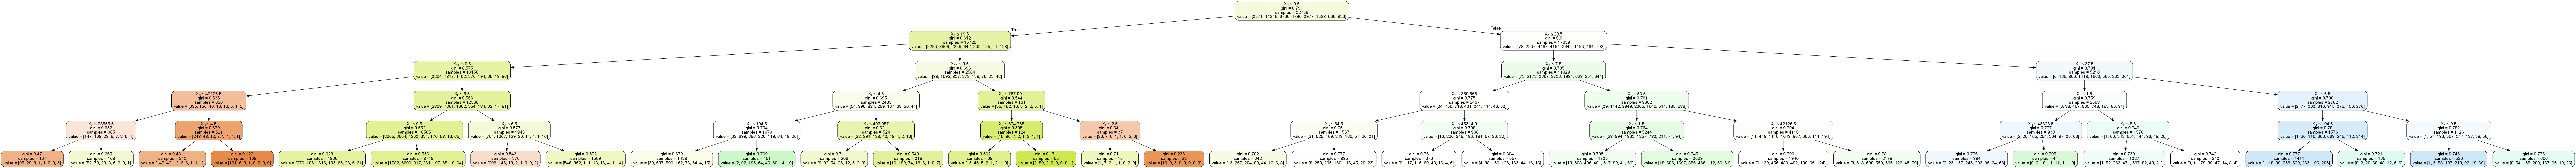

In [439]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Again we got a higher accuracy rate with Param model and this time we observed that our accuracy rate increased significantly compared to our previous tests. 

### Random Forest

In [564]:
xtr = features[:100]
xte = features[100:]
ytr = target[:100]
yte = target[100:]

In [565]:
tree1 = RandomForestClassifier()
model1 = tree1.fit(xtr,ytr)
pred1 = model1.predict(xte)

In [566]:
pred1

array(['b. 51-100', 'e. 201-300', 'c. 101-150', ..., 'd. 151-200',
       'd. 151-200', 'b. 51-100'], dtype=object)

In [567]:
print("Real Values: ", str(yte.values))
print("Estimated Values", str(pred1))

Real Values:  [['b. 51-100']
 ['d. 151-200']
 ['b. 51-100']
 ...
 ['c. 101-150']
 ['b. 51-100']
 ['b. 51-100']]
Estimated Values ['b. 51-100' 'e. 201-300' 'c. 101-150' ... 'd. 151-200' 'd. 151-200'
 'b. 51-100']


In [572]:
print("Error: ", str(np.mean(yte.values!=pred1)))

Error:  0.7607985183993785


In [573]:
print(accuracy_score(yte, pred1))

0.38598217030433446


In our last test we observed that Random Tree model had the higher accuracy score. However this time we achieved higher accuracy scores with Decision Tree Models.


### Confusion Matrix

In [450]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [510]:
# Replicating the code snippets for the previous model

features12 = dfM1.drop(["price"], axis=1).values
target12 = dfM1["price"].values

# creating the model
clf12 = GaussianNB()

# train-test split for the dataset
X_train12, X_test12, y_train12, y_test12 = train_test_split(features12, target12, test_size=0.33, random_state=42)

# fit the training data
clf12.fit(X_train12, y_train12)

# predict test data
y_pred12 = clf12.predict(X_test12)

# getting the accuracy score
accuracy_score(y_test12, y_pred12)

0.38280862667327714

In [455]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test12, y_pred12)

array([[   2,    0,    6,    0,    0, 1647,    1,    0],
       [   6,    2,   54,    0,    0, 5537,    3,    2],
       [   5,    0,   38,    2,    0, 3273,    6,    3],
       [   1,    0,   25,    0,    0, 2367,    0,   11],
       [   0,    0,   16,    0,    0, 1850,    0,   24],
       [   1,    0,    7,    0,    0,  560,    0,   34],
       [   0,    0,    0,    1,    0,  231,    0,   16],
       [   0,    0,    2,    0,    0,  308,    0,   95]], dtype=int64)

In Confusion Matrix we found the accuracy score around 38% as we did in previous tests.


### Classification Report

In [456]:
from sklearn.metrics import classification_report

print(classification_report(y_test12, y_pred12))

               precision    recall  f1-score   support

      a. 0-50       0.13      0.00      0.00      1656
    b. 51-100       1.00      0.00      0.00      5604
   c. 101-150       0.26      0.01      0.02      3327
   d. 151-200       0.00      0.00      0.00      2404
   e. 201-300       0.00      0.00      0.00      1890
   f. 301-400       0.04      0.93      0.07       602
   g. 401-500       0.00      0.00      0.00       248
h. 500-10.000       0.51      0.23      0.32       405

     accuracy                           0.04     16136
    macro avg       0.24      0.15      0.05     16136
 weighted avg       0.43      0.04      0.02     16136



In [458]:
from sklearn.metrics import classification_report, confusion_matrix

In [513]:
print("Trained Score: ")
print(confusion_matrix(yte,pred12))
print(classification_report(yte,pred12))

Trained Score: 
[[   29  4739   109    39   107     0     0     0]
 [   21 13381   714   498  2196     0     0     0]
 [    7  3585  1226  1262  3923     1     0     3]
 [    1  1160  1033  1575  3410     1     0     7]
 [    3   587   685  1688  2885     1     0     3]
 [    1   229   221   581   897     0     0     0]
 [    0    73    60   239   379     0     0     2]
 [    3   186    97   340   607     0     0     1]]
               precision    recall  f1-score   support

      a. 0-50       0.45      0.01      0.01      5023
    b. 51-100       0.56      0.80      0.66     16810
   c. 101-150       0.30      0.12      0.17     10007
   d. 151-200       0.25      0.22      0.23      7187
   e. 201-300       0.20      0.49      0.28      5852
   f. 301-400       0.00      0.00      0.00      1929
   g. 401-500       0.00      0.00      0.00       753
h. 500-10.000       0.06      0.00      0.00      1234

     accuracy                           0.39     48795
    macro avg       0.2

As we can observe from the f1-score, we found accuracy 39% which is close to what we had found in previous tests.

### k_Nearest_Neighbor with All of the Features

In [598]:
dfM1.describe()

,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_subway,nearest_subway,number_aoi_df,nearest_aoi_df,n_of_crime,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,7.029962,23.274466,1.095022,112.781327,15.462788,219.550153,0.973944,519.211191,39895.081685,0.519665,0.456611,0.023724
std,20.510550,44.550582,1.594493,131.622289,9.964604,145.099985,0.987971,239.249198,9408.284347,0.499618,0.498119,0.152190
min,1.000000,0.000000,0.010000,0.000000,0.000000,1.119726,0.000000,10.389715,5134.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.040000,0.000000,9.000000,122.055142,0.000000,313.884476,40136.000000,0.000000,0.000000,0.000000
50%,3.000000,5.000000,0.370000,45.000000,13.000000,191.452253,1.000000,431.061169,40136.000000,1.000000,0.000000,0.000000
75%,5.000000,24.000000,1.580000,227.000000,19.000000,276.889799,1.000000,727.637277,46511.000000,1.000000,1.000000,0.000000
max,1250.000000,629.000000,58.500000,365.000000,43.000000,999.397111,4.000000,999.997873,46511.000000,1.000000,1.000000,1.000000


In [599]:
def create_2D_sample(mean, std, n, label):
  """
  given a set of sample parameters
  returns a 2D sample
  """
  # create data points
  xvals = np.random.normal(loc=mean, scale=std, size=n).reshape(-1,1)
  yvals = np.random.normal(loc=mean, scale=std, size=n).reshape(-1,1)

  # class labels
  labels = np.repeat(label, n).reshape(-1,1)

  # merge observations and assigned labels
  sample = np.hstack([xvals, yvals, labels])

  return sample

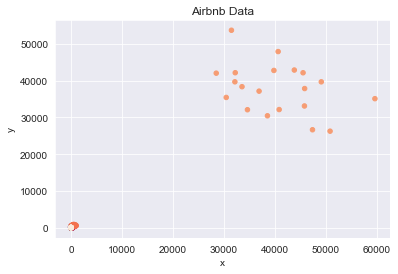

In [600]:
# number of observations
n = 20
# number of classes
n_classes = 11
# fix the random seed
np.random.seed(42)

# sample parameters
means = [7.029962, 23.274466, 1.095022, 112.781327, 15.462788, 219.550153, 0.973944, 519.211191, 39895.081685, 0.519665, 0.456611, 0.023724]
stds = [20.510550, 44.550582, 1.594493, 131.622289, 9.964604, 145.099985, 0.987971, 239.249198, 9408.284347, 0.499618, 0.498119, 0.152190]

d = []
for label in range(n_classes):
  sample = create_2D_sample(means[label], stds[label], n, label)
  d.append(sample)

data = np.vstack(d)

plt.scatter(data[:,0], data[:,1], c=data[:,2], s=20)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Airbnb Data")
plt.show()

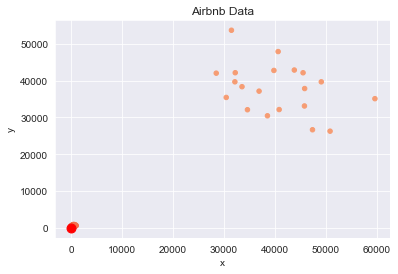

In [601]:
# new data point
d = np.array([[0,4]])

# let's visualize its location on the chart
plt.scatter(data[:,0], data[:,1], c=data[:,2], s=20)
plt.scatter(d[:,0], d[:,1], s=80, c="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Airbnb Data")
plt.show()

In [602]:
from collections import Counter
from scipy.spatial import distance

def KNeighbours(d, data, k=1):
  """
  calculates the distances between data point d and instances in data
  finds the nearest k neighbours and returns the most frequent label in the neighbourhood
  """
  # the list that contains the distances between d and data
  distances = []

  # iterate over the data
  for instance in data:
    # calculate the distance
    # the locations for an instance are stored
    # in the first two entries; x, y
    dist = distance.euclidean(d, instance[:2])
    # append it to the distances list
    # alongside the label of that instance
    # which resides at the last index
    distances.append((dist, instance[-1]))

  # sort the resulting list with respect to the distances
  distances = sorted(distances, key=lambda x: x[0])
  # select the `k` closest distances
  # and obtain the neighbourhood
  neg = distances[:k]

  # find the most frequent class label
  # in that neighbourhood, which are the last index
  labels = [entry[-1] for entry in neg]

  # create a counter and provide the labels as a parameter
  counter = Counter(labels)
  # get the most common label in the neighbourhood
  pred = counter.most_common()[0][0]
        
  return pred

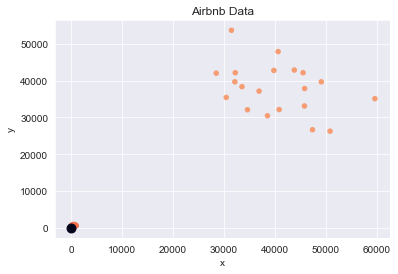

In [603]:
# obtain the label for the new data point
# with k set to 3
label = KNeighbours(d, data, k=3)

# visualize the data 
plt.scatter(data[:,0], data[:,1], c=data[:,2], s=20)
# and the new data point with its predicted label
plt.scatter(d[:,0], d[:,1], s=80, c=label)
plt.title("Airbnb Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [604]:
from sklearn.neighbors import KNeighborsClassifier

# set the hyperparameter k
k=6
# generate the model
model = KNeighborsClassifier(k, metric="euclidean")

# extract features and labels from the data
features = data[:, :2]
labels = data[:, 2]

# fit data
model.fit(features, labels)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

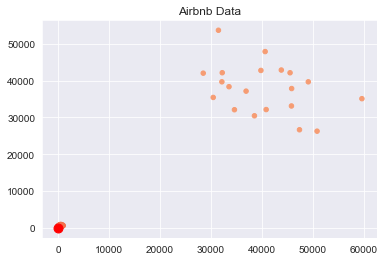

In [605]:
# new data point
d = np.array([[0,4]])

# let's visualize its location on the chart
plt.scatter(data[:,0], data[:,1], c=data[:,2], s=20)
plt.scatter(d[:,0], d[:,1], s=80, c="red")
plt.title("Airbnb Data")
plt.show()

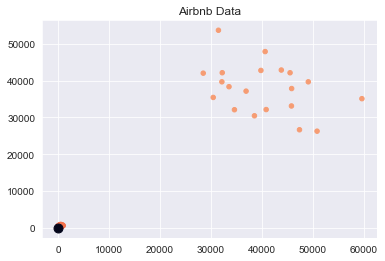

In [606]:
# now we can make the prediction
# pred is just another numpy array
# that stores the predicted labels
pred = model.predict(d)

# now let's also visualize the assigned color
plt.scatter(data[:,0], data[:,1], c=data[:,2], s=20)
plt.scatter(d[:,0], d[:,1], s=80, c=pred)
plt.title("Airbnb Data")
plt.show()

As you can observe these graphs are really difficult to observe and not practical.

### Cross Validation

In [473]:
# cross validation function
from sklearn.model_selection import cross_val_score

# create a model
model = DecisionTreeClassifier(criterion="entropy")

# perform CV with the given settings
accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
accuracies

array([0.04105617, 0.03998779, 0.04105617, 0.04166667, 0.04014654])

In [474]:
# Validation accuracy can be estimated using the mean of the CV accuracies
# Bonus: we can calculate a standard deviation over different folds
"Accuracy: {:.2f} (+/- {:.2f})".format(accuracies.mean(), accuracies.std() * 2)

'Accuracy: 0.04 (+/- 0.00)'

As you can see the accuracy scores were again really low. So we decided to work on smaller data with less features to seek an improvement in the accuracy score.


## Utilizing Data

In [480]:
df_first = pd.read_csv('tmp_main_data_with_prox_crime.csv')

In [481]:
df_first['name'].fillna(df_first['name'].mode()[0], inplace=True)
df_first['host_name'].fillna(df_first['host_name'].mode()[0], inplace=True)
df_first['last_review'].fillna(df_first['last_review'].mode()[0], inplace=True)
df_first['reviews_per_month'].fillna(df_first['reviews_per_month'].mode()[0], inplace=True)
df_first['nearest_subway'].fillna(df_first['nearest_subway'].mode()[0], inplace=True)
df_first['long_nearest_subway'].fillna(df_first['long_nearest_subway'].mode()[0], inplace=True)
df_first['latitude_nearest_subway'].fillna(df_first['latitude_nearest_subway'].mode()[0], inplace=True)
df_first['nearest_aoi_df'].fillna(df_first['nearest_aoi_df'].mode()[0], inplace=True)
df_first['long_nearest_aoi_df'].fillna(df_first['long_nearest_aoi_df'].mode()[0], inplace=True)
df_first['latitude_nearest_aoi_df'].fillna(df_first['latitude_nearest_aoi_df'].mode()[0], inplace=True)

In [482]:
df_first.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_subway,nearest_subway,long_nearest_subway,latitude_nearest_subway,number_aoi_df,nearest_aoi_df,long_nearest_aoi_df,latitude_nearest_aoi_df,n_of_crime
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,11.0,393.447551,-73.975776,40.650782,3.0,560.638794,-73.969087,40.661251,46511
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,35.0,93.263136,-73.984591,40.754184,4.0,258.915235,-73.981794,40.758021,40136
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,0.02,1,365,17.0,204.436840,-73.940770,40.814229,1.0,192.572103,-73.942680,40.803460,40136
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,14.0,118.486794,-73.959990,40.688889,1.0,851.219144,-73.966125,40.669937,46511
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,13.0,111.622098,-73.944250,40.795020,1.0,211.494984,-73.942680,40.803460,40136


In [483]:
df_first.drop(['id', 'n_of_crime','name','number_of_reviews', 'host_id','host_name', 'calculated_host_listings_count', 'latitude', 'longitude', 'long_nearest_subway', 'reviews_per_month', 'nearest_aoi_df', 'nearest_subway', 'availability_365', 'latitude_nearest_subway', 'latitude_nearest_aoi_df', 'long_nearest_aoi_df', 'last_review', 'neighbourhood_group','neighbourhood'], axis=1, inplace=True)
df_first.dropna(inplace=True)
df_first

,room_type,price,minimum_nights,number_subway,number_aoi_df
0,Private room,149,1,11.0,3.0
1,Entire home/apt,225,1,35.0,4.0
2,Private room,150,3,17.0,1.0
3,Entire home/apt,89,1,14.0,1.0
4,Entire home/apt,80,10,13.0,1.0
...,...,...,...,...,...
48890,Private room,70,2,17.0,0.0
48891,Private room,40,4,8.0,0.0
48892,Entire home/apt,115,10,17.0,1.0
48893,Shared room,55,1,30.0,2.0


Before utilizing our data we had a lot of features but in order to seek an improvement we decided that these features were the most important ones so we decided to keep them.

In [484]:
df_first = pd.get_dummies(df_first, columns=['room_type'])
df_first.head()

,price,minimum_nights,number_subway,number_aoi_df,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,149,1,11.0,3.0,0,1,0
1,225,1,35.0,4.0,1,0,0
2,150,3,17.0,1.0,0,1,0
3,89,1,14.0,1.0,1,0,0
4,80,10,13.0,1.0,1,0,0


In [485]:
df_first['price'] = df_first['price'].apply(price_change)

In [486]:
features11 = df_first.drop(['price'], axis=1)
target11 = df_first[['price']]

### Decision Tree

In [487]:
# Naive Model

train_and_predict(naive_model, features11, target11)


accuracy score: 0.44


ValueError: too many values to unpack (expected 4)

In [488]:
#Param Model

train_and_predict(param_model, features11, target11)

accuracy score: 0.45


ValueError: too many values to unpack (expected 4)

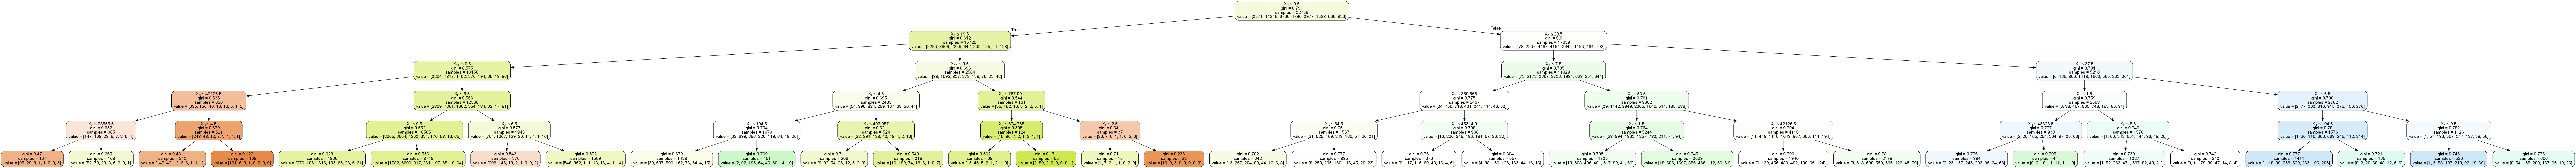

In [523]:
graph1 = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph1.create_png())

Compared to our accuracy results with all of our features, this time we got higher accuracy scores. Again between two Decision Tree tests, Param Model had 1% higher accuracy.

### Random Forest

In [577]:
tree4 = RandomForestClassifier()
model4 = tree4.fit(xtr,ytr)

In [578]:
pred4 = model4.predict(xte)

In [579]:
pred4

array(['b. 51-100', 'e. 201-300', 'c. 101-150', ..., 'd. 151-200',
       'd. 151-200', 'b. 51-100'], dtype=object)

In [580]:
print("Real Values: ", str(yte.values))
print("Estimated Values", str(pred4))

Real Values:  [['b. 51-100']
 ['d. 151-200']
 ['b. 51-100']
 ...
 ['c. 101-150']
 ['b. 51-100']
 ['b. 51-100']]
Estimated Values ['b. 51-100' 'e. 201-300' 'c. 101-150' ... 'd. 151-200' 'd. 151-200'
 'b. 51-100']


In [582]:
print("Error: ", str(np.mean(yte.values!=pred4)))

Error:  0.753372816069236


In [583]:
print(accuracy_score(yte, pred4))

0.3937903473716569


Different than previous tests, we got lower accuracy score with Random Forest test.

### Confusion Matrix

In [584]:
# Replicating the code snippets for the previous model

features13 = df_first.drop(["price"], axis=1).values
target13 = df_first["price"].values

# creating the model
clf13 = GaussianNB()

# train-test split for the dataset
X_train13, X_test13, y_train13, y_test13 = train_test_split(features13, target13, test_size=0.33, random_state=42)

# fit the training data
clf13.fit(X_train13, y_train13)

# predict test data
y_pred13 = clf13.predict(X_test13)

# getting the accuracy score
accuracy_score(y_test13, y_pred13)

0.3350892414476946

In [585]:
confusion_matrix(y_test13, y_pred13)

array([[ 599, 1008,    8,    1,   38,    0,    0,    2],
       [1361, 2927,  152,   19, 1135,    0,    0,   10],
       [ 206,  708,  154,   16, 2231,    0,    0,   12],
       [  50,  235,   53,   13, 2051,    0,    0,    2],
       [  26,  103,   33,   11, 1712,    0,    0,    5],
       [  10,   32,   11,    1,  544,    0,    0,    4],
       [   4,   19,    1,    0,  222,    0,    0,    2],
       [   8,   44,    5,    4,  342,    0,    0,    2]], dtype=int64)

By utilizing the data we had occured higher accuracy scores for Decision Tree models, we got different scores with Random Forest and Confusion Matrix. We can say that our accuracy scores fluctuates slightly.

### Classification Report

In [521]:
print(classification_report(y_test12, y_pred13))

               precision    recall  f1-score   support

      a. 0-50       0.26      0.36      0.31      1656
    b. 51-100       0.58      0.52      0.55      5604
   c. 101-150       0.37      0.05      0.08      3327
   d. 151-200       0.20      0.01      0.01      2404
   e. 201-300       0.21      0.91      0.34      1890
   f. 301-400       0.00      0.00      0.00       602
   g. 401-500       0.00      0.00      0.00       248
h. 500-10.000       0.05      0.00      0.01       405

     accuracy                           0.34     16136
    macro avg       0.21      0.23      0.16     16136
 weighted avg       0.36      0.34      0.28     16136



In [528]:
from sklearn.metrics import classification_report

print(classification_report(y_test13, y_pred13))

               precision    recall  f1-score   support

      a. 0-50       0.26      0.36      0.31      1656
    b. 51-100       0.58      0.52      0.55      5604
   c. 101-150       0.37      0.05      0.08      3327
   d. 151-200       0.20      0.01      0.01      2404
   e. 201-300       0.21      0.91      0.34      1890
   f. 301-400       0.00      0.00      0.00       602
   g. 401-500       0.00      0.00      0.00       248
h. 500-10.000       0.05      0.00      0.01       405

     accuracy                           0.34     16136
    macro avg       0.21      0.23      0.16     16136
 weighted avg       0.36      0.34      0.28     16136



This time we got a similar score as Confusion Matrix score. This shows that although our results fluctuate, it is not severe.

### k_Nearest_Neighbor with Utilized Data

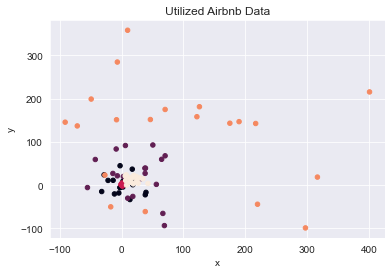

In [586]:
# number of observations
n = 20
# number of classes
n_classes = 5

# fix the random seed
np.random.seed(42)

# sample parameters
means = [7.029962, 23.274466, 1.095022, 112.781327, 15.462788, 219.550153, 0.973944, 519.211191, 39895.081685, 0.519665, 0.456611, 0.023724]
stds = [20.510550, 44.550582, 1.594493, 131.622289, 9.964604, 145.099985, 0.987971, 239.249198, 9408.284347, 0.499618, 0.498119, 0.152190]

d = []
for label in range(n_classes):
  sample = create_2D_sample(means[label], stds[label], n, label)
  d.append(sample)

data = np.vstack(d)

plt.scatter(data[:,0], data[:,1], c=data[:,2], s=20)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Utilized Airbnb Data")
plt.show()

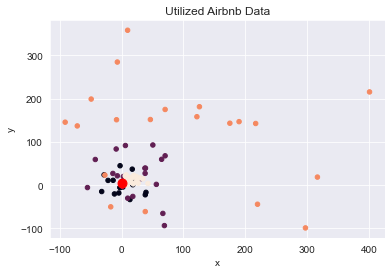

In [589]:
# new data point
d = np.array([[0,4]])

# let's visualize its location on the chart
plt.scatter(data[:,0], data[:,1], c=data[:,2], s=20)
plt.scatter(d[:,0], d[:,1], s=80, c="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Utilized Airbnb Data")
plt.show()

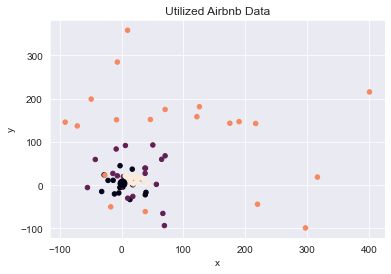

In [590]:
# obtain the label for the new data point
# with k set to 3
label = KNeighbours(d, data, k=3)

# visualize the data 
plt.scatter(data[:,0], data[:,1], c=data[:,2], s=20)
# and the new data point with its predicted label
plt.scatter(d[:,0], d[:,1], s=80, c=label)
plt.title("Utilized Airbnb Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

As we did these graphs we decided that making our data smaller was a great idea as we can now observe more of the data compared to our previous kNN graphs with all of the data.

### Cross Validation

In [591]:
# cross validation function
from sklearn.model_selection import cross_val_score

# create a model
model = DecisionTreeClassifier(criterion="entropy")

# perform CV with the given settings
accuracies = cross_val_score(model, X_train13, y_train13, cv=5, scoring="accuracy")
accuracies

array([0.42094017, 0.43070818, 0.43040293, 0.43025031, 0.42619447])

In [592]:
# Validation accuracy can be estimated using the mean of the CV accuracies
# Bonus: we can calculate a standard deviation over different folds
"Accuracy: {:.2f} (+/- {:.2f})".format(accuracies.mean(), accuracies.std() * 2)

'Accuracy: 0.43 (+/- 0.01)'

This time we found a similar score as we found in Decision Tree score.

## Conclusion


While doing first and second steps of our project we have already observed that our features did not affect the price as much as we expected. However, we wanted to do as many test as we could to make sure that we had that accuracy level would be approximately same. Eventually, our accuracy levels in different tests were around 40% which makes them confidential.

First, we worked on our data set with all of our features then we thought that less features might improve our accuracy level. To do that we utilized our data and worked on that data as well and although it was a small improvement, we still saw that our assumption about smalleer data set was correct.

The lowest accuracy score we found is 5% with Decision Tree Model and the highest score we found is 45% with Param Model with smaller data set with less features.

#  DATA ANALYSIS

#### Importing Libraries

In [40]:
#First we import the libraries that are needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import reverse_geocoder as rg
from geopy.distance import geodesic
from scipy import stats
import seaborn as sns
from os.path import join
from os import listdir
from scipy.stats import f_oneway

import warnings
warnings.filterwarnings("ignore")

import datetime


%matplotlib inline

pd.set_option('display.max_columns', None)

Since our data is big, it takes more than 3 hours to run the data and repeat the changes we made in the first step.
So we used the same data we had worked on and saved in the previous step of our project.
Our manipulated data has the information of our main data as well as our additional datas such as our subway data, AOI data and crime data. After looking at the instructions we figured out that our data from first step would be useful and efficient.

We can share the csv file if needed.


In [91]:
#Reading the manipulated data from the first step of our project.
df = pd.read_csv('tmp_main_data_with_prox_crime.csv')

In [92]:
#Our manipulated data:

df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_subway,nearest_subway,long_nearest_subway,latitude_nearest_subway,number_aoi_df,nearest_aoi_df,long_nearest_aoi_df,latitude_nearest_aoi_df,n_of_crime
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,11.0,393.447551,-73.975776,40.650782,3.0,560.638794,-73.969087,40.661251,46511
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,35.0,93.263136,-73.984591,40.754184,4.0,258.915235,-73.981794,40.758021,40136
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,17.0,204.436840,-73.940770,40.814229,1.0,192.572103,-73.942680,40.803460,40136
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,14.0,118.486794,-73.959990,40.688889,1.0,851.219144,-73.966125,40.669937,46511
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,13.0,111.622098,-73.944250,40.795020,1.0,211.494984,-73.942680,40.803460,40136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,17.0,79.322475,-73.950426,40.680438,0.0,NaN,NaN,NaN,46511
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,8.0,133.273731,-73.933147,40.706152,0.0,NaN,NaN,NaN,46511
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,17.0,159.827727,-73.947535,40.817906,1.0,753.940988,-73.942680,40.803460,40136
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,30.0,154.702322,-73.989735,40.757308,2.0,582.245970,-73.988067,40.742181,40136


In [93]:
# Types in our data:

df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_subway                     float64
nearest_subway                    float64
long_nearest_subway               float64
latitude_nearest_subway           float64
number_aoi_df                     float64
nearest_aoi_df                    float64
long_nearest_aoi_df               float64
latitude_nearest_aoi_df           

In [44]:
#Now we are looking into our data and observe empty places.
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
number_subway                         0
nearest_subway                     1309
long_nearest_subway                1309
latitude_nearest_subway            1309
number_aoi_df                         0
nearest_aoi_df                    18316
long_nearest_aoi_df               18316
latitude_nearest_aoi_df           18316
n_of_crime                            0


In [45]:
df['name'].fillna(df['name'].mode()[0], inplace=True)
df['host_name'].fillna(df['host_name'].mode()[0], inplace=True)
df['last_review'].fillna(df['last_review'].mode()[0], inplace=True)
df['reviews_per_month'].fillna(df['reviews_per_month'].mode()[0], inplace=True)
df['nearest_subway'].fillna(df['nearest_subway'].mode()[0], inplace=True)
df['long_nearest_subway'].fillna(df['long_nearest_subway'].mode()[0], inplace=True)
df['latitude_nearest_subway'].fillna(df['latitude_nearest_subway'].mode()[0], inplace=True)
df['nearest_aoi_df'].fillna(df['nearest_aoi_df'].mode()[0], inplace=True)
df['long_nearest_aoi_df'].fillna(df['long_nearest_aoi_df'].mode()[0], inplace=True)
df['latitude_nearest_aoi_df'].fillna(df['latitude_nearest_aoi_df'].mode()[0], inplace=True)

In [46]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_subway                     0
nearest_subway                    0
long_nearest_subway               0
latitude_nearest_subway           0
number_aoi_df                     0
nearest_aoi_df                    0
long_nearest_aoi_df               0
latitude_nearest_aoi_df           0
n_of_crime                        0
dtype: int64

## Features That Affect Airbnb Prices

We discussed the features that would affect Airbnb prices and then we analyzed these features.


### Room Types Hypothesis

First, we thought that the type of the room would play a significant role in the pricing. While we were working on our data we observed that there were three room types in our data. These three room types are Entire home/apt, Private room and Shared room. Our guess was that the more space one has on their own would increase the price as it was more secure, hygenic and comfortable. Moreover, we expected that Private rooms would be in the middle price wise since although it does not provide as much security, hygine and comfort as Entire house/apt., it still provides more than Shared rooms. Although one still has to share bathrooms, the kitchen and living areas of the house, Private rooms provide more space and comfort than Shared rooms. In addition, we agreed that shared rooms would be cheaper since it meant less of everything that increased the price. We also expected that Shared rooms would be more common since they are cheaper.

So we decided on our null hypothesis.

**Null Hypothesis (H₀):** Room type affects the price.

**Alternative Hypothesis (Hᴬ):** Room type does not affect the price.

**Significance level**: As most of hypothesis tests assume significance level as 0.05, we are setting it as *0.05* for our test too.


In [47]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_subway,nearest_subway,long_nearest_subway,latitude_nearest_subway,number_aoi_df,nearest_aoi_df,long_nearest_aoi_df,latitude_nearest_aoi_df,n_of_crime
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.095022,7.143982,112.781327,15.462788,219.550153,-73.954689,40.730351,0.973944,519.211191,-73.952967,40.731127,39895.081685
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.594493,32.952519,131.622289,9.964604,145.099985,0.037732,0.052465,0.987971,239.249198,0.034789,0.041822,9408.284347
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,1.119726,-74.030876,40.576034,0.000000,10.389715,-74.248565,40.499566,5134.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000,9.000000,122.055142,-73.981929,40.693172,0.000000,313.884476,-73.966125,40.720900,40136.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000,13.000000,191.452253,-73.956848,40.728251,1.000000,431.061169,-73.951981,40.720900,40136.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,19.000000,276.889799,-73.939793,40.759600,1.000000,727.637277,-73.951981,40.742181,46511.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,43.000000,999.397111,-73.755405,40.903125,4.000000,999.997873,-73.732287,40.896210,46511.000000


In [49]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

First, we wanted to observe the prices to understand the range of the prices of Airbnb houses. Here we can see that the mean of Airbnb houses is 152.72 dolars and the maximum price is 10.000 dolars.

Since we are going the analyze the effect of room types to the price, we wanted to visualize room types and prices before applying an appropriate test after studying the price.


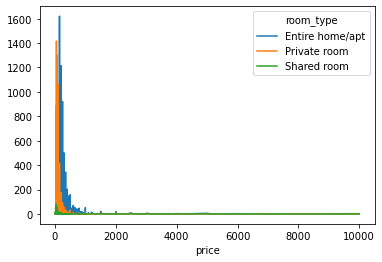

In [48]:
graph1 = pd.crosstab(index=[df['price']], columns= df['room_type'])
graph1.plot()

By looking at this graph, the Entire home/apt room type is prioritized. We can also see that there are not many Shared room options.

In [50]:
table = pd.crosstab(index=[df['price']], columns=df['room_type'])
table

room_type,Entire home/apt,Private room,Shared room
price,,,
0,2,7,2
10,7,8,2
11,2,0,1
12,2,1,1
13,0,0,1
...,...,...,...
7703,1,0,0
8000,1,0,0
8500,1,0,0


We made this table because we wanted to observe the prices and room types better in order to comment and conduct our hypothesis. We expected that the pricing of entire home/apt would be higher since it provides more security, hygiene (as one does not have to share bathrooms, kitchen or living spaces with other people) and comfort. 

After that we wanted to test our hypothesis and we decided that ANOVA is an appropriate test to apply here since we are working on more than two room types, so there are more than 2 groups. We assumed that this is a normal distribution.


In [51]:
# Creating samples based on room types.
# We had 3 different values for room types.

sample_1, sample_2, sample_3 = [df[df['room_type'] == i] for i in df.room_type.unique()]

In [52]:
f_stats, p_values = f_oneway(sample_1['price'].values, sample_2['price'].values, sample_3['price'].values)
p_values

0.0

By applying ANOVA test, as p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that room types does not affect the prices. Here, we reject the null hypothesis which means that the alternative hypothesis is true and room types and prices have no correlation.



### Subway Stations Hypothesis

Another feature we thought that it had a huge impact on the pricing was subway stations. New York is one of the most visited cities in the world with many famous places to visit. So transportation would play a huge role on the pricing of the Airbnbs. We thought that if the houses had subway stations close to them, their prices would be higher. 

In the first step of our project we decided a walking distance which is 1 km and we found how many subway stations each house has in walking distance and added these result to our data.

We assumed that it was normal distribution.

We decided on our null hypothesis.

**Null Hypothesis (H₀):** Number of subway stations in walking distance affects the price.

**Alternative Hypothesis (Hᴬ):** Number of subway stations in walking distance does not affect the price.

**Significance level:** As most of hypothesis tests assume significance level as 0.05, we are setting it as 0.05 for our test too.


Before starting on analyzing the relationship between number of subway stations in walking distance and price we wanted to visualize it so that we can have a better understanding of the data.

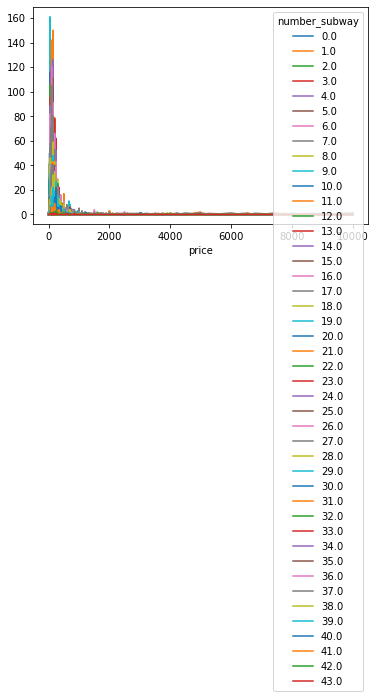

In [95]:
# We added number of subway stations in walking distance (1 km) under 'number_subway' in the first step of our project.

graph2 = pd.crosstab(index=[df['price']], columns= df['number_subway'])
graph2.plot()

However, the graph was difficult to analyze so we decided to catagorize number of stations in order to understand better.


In [54]:
# Detailed information on the number of subway stations in walking distance of each Airbnb house.
df['number_subway'].describe()

count    48895.000000
mean        15.462788
std          9.964604
min          0.000000
25%          9.000000
50%         13.000000
75%         19.000000
max         43.000000
Name: number_subway, dtype: float64

Here we can observe that the maximum number of subway stations in walking distance is 43 and the mean number is 15.46.

In [55]:
#This function catagorizes number of stations close to Airbnb houses
def change_no_stations(number_subway):
     if number_subway < 5:
        return 'a. 0-5'
     elif number_subway < 10:
        return 'b. 6-10'
     elif number_subway < 15:
        return 'c. 11-15'
     elif number_subway < 20:
        return 'd. 16-20'
     elif number_subway < 30:
        return 'e. 21-30'
     elif number_subway < 40:
        return 'f. 31-40'
     elif number_subway < 45:
        return 'g. 41-45'
     elif number_subway == 0:
        return 'h. no subway'

In [96]:
# Applying the change
df['number_subway'] = df['number_subway'].apply(change_no_stations)

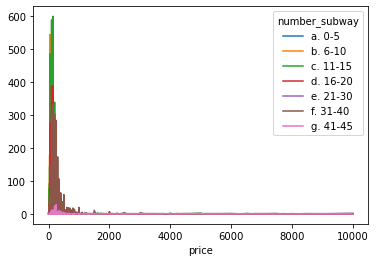

In [57]:
graph3 = pd.crosstab(index=[df['price']], columns= df['number_subway'])
graph3.plot()

Now that we can see it a little bit more clear, we can see that our thoughts were not correct since we thought that the more a house has subway stations closer, the higher the price would be. However we can see from this graph that it does not affect much. We still wanted to test our hypothesis with statiscal tests and since we grouped number of subway stations in walking distance, we decided to do ANOVA test. 

In [58]:
# Creating a table to see our groups and data better.
table2 = pd.crosstab(index=[df['price']], columns=df['number_subway'])
table2

number_subway,a. 0-5,b. 6-10,c. 11-15,d. 16-20,e. 21-30,f. 31-40,g. 41-45
price,,,,,,,
0,0,1,5,3,2,0,0
10,2,2,7,1,2,3,0
11,0,1,2,0,0,0,0
12,0,1,1,1,0,1,0
13,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
7703,0,0,1,0,0,0,0
8000,0,1,0,0,0,0,0
8500,0,0,0,0,0,1,0


In [97]:
# Creating samples based on number of subway stations in walking distance.
# We had 7 different groups for subway stations.

sample_1, sample_2, sample_3, sample_4, sample_5, sample_6, sample_7 = [df[df['number_subway'] == i] for i in df.number_subway.unique()]

In [60]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_subway                      object
nearest_subway                    float64
long_nearest_subway               float64
latitude_nearest_subway           float64
number_aoi_df                     float64
nearest_aoi_df                    float64
long_nearest_aoi_df               float64
latitude_nearest_aoi_df           

In [61]:
f_stats, p_values = f_oneway(sample_1['price'].values, sample_2['price'].values, sample_3['price'].values, sample_4['price'].values, sample_5['price'].values, sample_6['price'].values, sample_7['price'].values)
p_values

0.0

By applying ANOVA test, we can see that the p-value we obtained is a lot smaller than the threshold significance level 0.05, we can conclude that the number of subway stations in walking distance does not affect the prices. Here, we reject the null hypothesis which means that the alternative hypothesis is true and the number of subway stations in walking distance and prices have no correlation.

By applying a statistical test we also comfirmed our second thoughts after seeing the graph.

## Features That Affect Airbnb Prices in Different Neighborhoods

## Crime Hypothesis

Since a lot of tourists visit New York people want to make sure that they are staying in safe neighbourhoods. So we thought that the number of crimes in the neighbourhood of the Airbnb house is in would affect the price. We assumed that the more crime a neighbourhood has the lower the price would be. Also, the prices in the safer neighbourhoods would be higher.

Our manipulated data which we obtained in the first step of the project has the number of crimes in the neighbourhoods of the houses. Again, we assume that this is a normal distribution.

**Null Hypothesis (H₀):** Number of crimes in a neighborhood affects the prices of Airbnb houses.

**Alternative Hypothesis (Hᴬ):** Number of crimes in a neighborhood affects the prices of Airbnb houses.

**Significance level:** As most of hypothesis tests assume significance level as 0.05, we are setting it as 0.05 for our test too.

In [99]:
# Detailed information on price

df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [98]:
# This function catagorizes the prices
def price_change(price):
    if price < 50:
        return 'a. 0-50'
    elif price < 100:
        return 'b. 51-100'
    elif price < 150:
        return 'c. 101-150'
    elif price < 200:
        return 'd. 151-200'
    elif price < 300:
        return 'e. 201-300'
    elif price < 400:
        return 'f. 301-400'
    elif price < 500:
        return 'g. 401-500'
    else:
        return 'h. 500-10.000'

In [100]:
# Applying the changes
df['price'] = df['price'].apply(price_change)

In [64]:
freq = pd.crosstab(index=[df['price'], df['n_of_crime']], columns= df['neighbourhood_group'])
freq

neighbourhood_group       Bronx  Brooklyn  Manhattan  Queens  Staten Island
price         n_of_crime                                                   
a. 0-50       5134            0         0          0       0             85
              16975           0         0          0    1157              0
              40136           0         0        722       0              0
              44117         314         0          0       0              0
              46511           0      2749          0       0              0
b. 51-100     5134            0         0          0       0            164
              16975           0         0          0    2708              0
              40136           0         0       5314       0              0
              44117         509         0          0       0              0
              46511           0      8155          0       0              0
c. 101-150    5134            0         0          0       0             66
              16975           0         0          0     958              0
              40136           0         0       4724       0              0
              44117         167         0          0       0              0
              46511           0      4118          0       0              0
d. 151-200    5134            0         0          0       0             27
              16975           0         0          0     432              0
              40136           0         0       4145       0              0
              44117          47         0          0       0              0
              46511           0      2549          0       0              0
e. 201-300    5134            0         0          0       0             20
              16975           0         0          0     280              0
              40136           0         0       3921       0              0
              44117          26         0          0       0              0
              46511           0      1620          0       0              0
f. 301-400    5134            0         0          0       0              3
              16975           0         0          0      68              0
              40136           0         0       1383       0              0
              44117          14         0          0       0              0
              46511           0       462          0       0              0
g. 401-500    5134            0         0          0       0              2
              16975           0         0          0      27              0
              40136           0         0        547       0              0
              44117           5         0          0       0              0
              46511           0       172          0       0              0
h. 500-10.000 5134            0         0          0       0              6
              16975           0         0          0      36              0
              40136           0         0        905       0              0
              44117           9         0          0       0              0
              46511           0       279          0       0              0

Now we can observe our data more clear as we can see prices, neighbourhoods and number of crimes in that neighbourhood.


Since we have catagorized the prices, we decided to apply Chi2 test.


In [65]:
import scipy.stats as stats

In [104]:
chi_stats = stats.chi2_contingency(freq)
print ('Test t=%f p-value=%f' % (chi_stats[0], chi_stats[1]))
chi_stats

Test t=195580.000000 p-value=0.000000


(195580.0,
 0.0,
 156,
 array([[1.89661520e+00, 3.49491768e+01, 3.76558953e+01, 9.84988240e+00,
         6.48430310e-01],
        [2.58162798e+01, 4.75719971e+02, 5.12563186e+02, 1.34074282e+02,
         8.82628081e+00],
        [1.61100726e+01, 2.96862419e+02, 3.19853605e+02, 8.36660599e+01,
         5.50784334e+00],
        [7.00631966e+00, 1.29106371e+02, 1.39105307e+02, 3.63866244e+01,
         2.39537785e+00],
        [6.13387667e+01, 1.13029749e+03, 1.21783595e+03, 3.18556785e+02,
         2.09709991e+01],
        [3.65935167e+00, 6.74313529e+01, 7.26537274e+01, 1.90044790e+01,
         1.25108907e+00],
        [6.04239288e+01, 1.11343966e+03, 1.19967252e+03, 3.13805665e+02,
         2.06582268e+01],
        [1.18571919e+02, 2.18494030e+03, 2.35415797e+03, 6.15791472e+02,
         4.05383373e+01],
        [1.13573781e+01, 2.09283894e+02, 2.25492361e+02, 5.89834134e+01,
         3.88295327e+00],
        [1.81963493e+02, 3.35306514e+03, 3.61275089e+03, 9.45009306e+02,
         6.22

In [67]:
alpha = 0.05

In [105]:
critical_value = crit = stats.chi2.ppf( q = 1 - alpha,
                                     df= chi_stats[2])
critical_value

186.14575078141743

In [69]:
#x = np.linspace(0, 50, 10000) #set range for x-axis
#plt.plot(x, stats.chi2.pdf(x, chi_stats[2])) #plot chi2 distribution with given degrees of freedom

#plt.axvline(x=critical_value, ymin=0.05, ymax=0.05, c='r')
#plt.axvline(x=chi_stats[0], ymin=0.05, ymax=0.1, c='r')

In [106]:
obs_chi_val = chi_stats[0]
obs_chi_val

195580.0

In [108]:
if obs_chi_val <= critical_value:
    print('Null hpothesis cannot be rejected!')
else:
    print('We reject null hypothesis!')

We reject null hypothesis!


By applying Chi2 test, we can see that the p-value we obtained is a lot smaller than the threshold significance level 0.05, we can conclude that the number of crimes in the neighbourhood of the houses does not affect the prices. Here, we reject the null hypothesis which means that the alternative hypothesis is true and the number of crimes in the neighbourhood of the houses and prices have no correlation.



## Subway Stations Hypothesis for Neighbourhoods

After analyzig subway stations for each house we wanted to observe the effect of subway stations in walking distance neihgbourhood by neighbourhood to see if there are any differences since we thought that people would prefer to stay in neighbourhoods that have a lot of subway stations in walking distance to the places that they are staying in since transportation is a huge issue in New York and it would affect the price. We thought that if a neighbourhood has more subway stations in walking distance the prices of the houses in that neighbourhood would be higher.

In the first step of our project we decided a walking distance which is 1 km and we found how many subway stations each house has in walking distance and added these result to our data.

We assumed that it was normal distribution.

We decided on our null hypothesis.

**Null Hypothesis (H₀):** Number of subway stations in walking distance in a neighborhood affects the prices of Airbnb houses.

**Alternative Hypothesis (Hᴬ):** Number subway stations in walking distance affects the prices of Airbnb houses.

**Significance level:** As most of hypothesis tests assume significance level as 0.05, we are setting it as 0.05 for our test too.

In [72]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                              object
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_subway                      object
nearest_subway                    float64
long_nearest_subway               float64
latitude_nearest_subway           float64
number_aoi_df                     float64
nearest_aoi_df                    float64
long_nearest_aoi_df               float64
latitude_nearest_aoi_df           

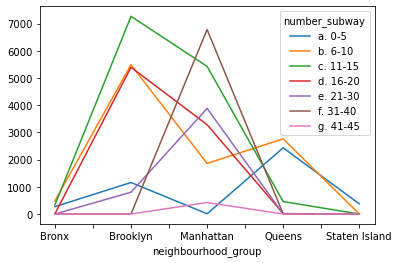

In [73]:
graph5 = pd.crosstab(index=[df['neighbourhood_group']], columns= df['number_subway'])
graph5.plot()

We want to visualize the number of subway stations in walking distance in neighbourhoods to observe a correlation.

In [74]:
freq3 = pd.crosstab(index=[df['price'], df['number_subway']], columns= df['neighbourhood_group'])
freq3

neighbourhood_group          Bronx  Brooklyn  Manhattan  Queens  Staten Island
price         number_subway                                                   
a. 0-50       a. 0-5            57       151          0     550             85
              b. 6-10          147       913        134     501              0
              c. 11-15         107       993        292     101              0
              d. 16-20           3       657        189       5              0
              e. 21-30           0        35         71       0              0
              f. 31-40           0         0         35       0              0
              g. 41-45           0         0          1       0              0
b. 51-100     a. 0-5           141       484          3    1183            164
              b. 6-10          214      2443        761    1316              0
              c. 11-15         151      2864       1780     205              0
              d. 16-20           3      2160       1070       4              0
              e. 21-30           0       204        621       0              0
              f. 31-40           0         0       1032       0              0
              g. 41-45           0         0         47       0              0
c. 101-150    a. 0-5            38       219          4     338             66
              b. 6-10           78       968        407     541              0
              c. 11-15          51      1540       1306      75              0
              d. 16-20           0      1154        696       4              0
              e. 21-30           0       237        808       0              0
              f. 31-40           0         0       1439       0              0
              g. 41-45           0         0         64       0              0
d. 151-200    a. 0-5            12       126          1     163             27
              b. 6-10           19       576        222     221              0
              c. 11-15          15       968        930      47              0
              d. 16-20           1       729        536       1              0
              e. 21-30           0       150        903       0              0
              f. 31-40           0         0       1487       0              0
              g. 41-45           0         0         66       0              0
e. 201-300    a. 0-5             5       104          1     127             20
              b. 6-10           12       373        166     132              0
              c. 11-15           8       577        683      20              0
              d. 16-20           1       452        442       1              0
              e. 21-30           0       114        899       0              0
              f. 31-40           0         0       1582       0              0
              g. 41-45           0         0        148       0              0
f. 301-400    a. 0-5             8        34          0      31              3
              b. 6-10            6       114         80      31              0
              c. 11-15           0       163        213       6              0
              d. 16-20           0       122        178       0              0
              e. 21-30           0        29        260       0              0
              f. 31-40           0         0        611       0              0
              g. 41-45           0         0         41       0              0
g. 401-500    a. 0-5             4        13          0      21              2
              b. 6-10            1        45         18       5              0
              c. 11-15           0        60         87       1              0
              d. 16-20           0        49         62       0              0
              e. 21-30           0         5        136       0              0
              f. 31-40           0         0        216       0              0
              g. 41-45           0         0      

Then we wanted to see the number of subway stations in walking distance in each neighbourhood as well as the prices. With this table we could not comment on the correlation clearly. so we decided to do Chi 2 test since we catagorized the prices and number of subway stations in walking distance.

In [75]:
chi_stats3 = stats.chi2_contingency(freq3)
print ('Test t=%f p-value=%f' % (chi_stats3[0], chi_stats3[1]))
chi_stats3

Test t=35485.656340 p-value=0.000000


(35485.65633969062,
 0.0,
 220,
 array([[1.88099601e+01, 3.46613601e+02, 3.73457879e+02, 9.76876572e+01,
         6.43090296e+00],
        [3.78207383e+01, 6.96927702e+02, 7.50902853e+02, 1.96418243e+02,
         1.29304632e+01],
        [3.33134881e+01, 6.13872011e+02, 6.61414725e+02, 1.73010287e+02,
         1.13894877e+01],
        [1.90554044e+01, 3.51136435e+02, 3.78330995e+02, 9.89623479e+01,
         6.51481747e+00],
        [2.36519071e+00, 4.35836793e+01, 4.69591165e+01, 1.22833828e+01,
         8.08630739e-01],
        [7.80959198e-01, 1.43908375e+01, 1.55053686e+01, 4.05583393e+00,
         2.67000716e-01],
        [2.23131200e-02, 4.11166786e-01, 4.43010533e-01, 1.15880969e-01,
         7.62859188e-03],
        [4.40684119e+01, 8.12054402e+02, 8.74945802e+02, 2.28864915e+02,
         1.50664690e+01],
        [1.05630310e+02, 1.94646356e+03, 2.09721186e+03, 5.48580509e+02,
         3.61137540e+01],
        [1.11565600e+02, 2.05583393e+03, 2.21505266e+03, 5.79404847e+02,
    

In [76]:
critical_value3 = crit3 = stats.chi2.ppf( q = 1 - alpha,
                                     df= chi_stats3[2])
critical_value3

255.60181599470303

In [77]:
obs_chi_val3 = chi_stats3[0]
obs_chi_val3

35485.65633969062

In [109]:
if obs_chi_val3 <= critical_value3:
    print('Null hpothesis cannot be rejected!')
else:
    print('We reject null hypothesis!')

We reject null hypothesis!


Even though we could observe the correlation with our eyes, we were able to observe by applying Chi 2 test that the p-value we obtained is a lot smaller than the threshold significance level 0.05, we can conclude that the number of subway stations in walking distance in neighbourhoods does not affect the prices. Here, we reject the null hypothesis which means that the alternative hypothesis is true and the number of subway stations in walking distance in neighbourhoods and prices have no correlation.

# Effects of Proximity of POIs to Airbnb Houses


## Number of AOIs to the Houses Hypothesis

Since New York is full of tourists we thought that the distance between AOIs (Area of Interests) and Airbnb houses would important. That is why we wanted to observe the effect of AOIs in walking distance to the prices of the houses. We expected that if a house has a lot of AOIs in walking distance its price would be higher. Also, the less AOIs a house has, the lower its price would be.

In the first step of the project we worked on the number of AOIs in walking distance (1 km) from Airbnb houses. Also, we assumed that this was a normal distribution.

**Null Hypothesis (H₀):** Number of AOIs in walking distance affects the prices of Airbnb houses.

**Alternative Hypothesis (Hᴬ):** Number of AOIs in walking distance does not eaffect the prices of Airbnb houses.

**Significance level:** As most of hypothesis tests assume significance level as 0.05, we are setting it as 0.05 for our test too.

In [111]:
# Detailed information on AOIs

df['number_aoi_df'].describe()

count    48895.000000
mean         0.973944
std          0.987971
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: number_aoi_df, dtype: float64

We can see that the maximum number of AOIs in walking distance from an Airbnb house is 4.


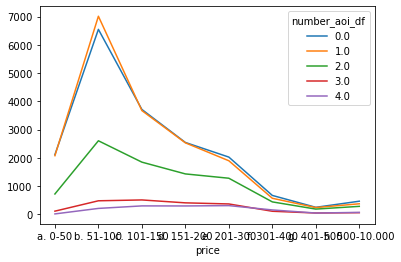

In [110]:
# In the first step of our project we found the number of AOIs in walking distance and added them to our manipulated data under 'number_aoi_df'

graph6 = pd.crosstab(index=[df['price']], columns= df['number_aoi_df'])
graph6.plot()

We expected that if a house has more AOIs in walking distance, the prices of the houses would be higher. However, from this graph we can note that number of AOIs do not really affect the price since we can see that there are not many AOIs in walking distance on the expensive side of the graph. Here we can observe that the number of AOIs in walking distance has no correlation with the prices. But we still wanted to test it to comfirm our outcome from this graph.

Since we had catagorized the price before we decided to use Chi 2 test again.


In [80]:
freq1 = pd.crosstab(index=[df['price']], columns= df['number_aoi_df'])
freq1

number_aoi_df,0.0,1.0,2.0,3.0,4.0
price,,,,,
a. 0-50,2112,2075,718,110,12
b. 51-100,6549,7014,2603,477,207
c. 101-150,3712,3672,1846,507,296
d. 151-200,2543,2530,1429,404,294
e. 201-300,2025,1895,1276,365,306
f. 301-400,667,566,438,106,153
g. 401-500,246,237,183,44,43
h. 500-10.000,462,371,280,56,66


In [81]:
chi_stats1 = stats.chi2_contingency(freq1)
print ('Test t=%f p-value=%f' % (chi_stats1[0], chi_stats1[1]))
chi_stats1

Test t=1398.495688 p-value=0.000000


(1398.4956878700468,
 3.2702619185448935e-277,
 28,
 array([[1883.10731159, 1887.63104612,  901.97097863,  212.71833521,
          141.57232846],
        [6311.98691073, 6327.15001534, 3023.31629001,  713.01053277,
          474.53625115],
        [3758.34805195, 3767.37662338, 1800.17402597,  424.54805195,
          282.55324675],
        [2697.11013396, 2703.58932406, 1291.86215359,  304.66918908,
          202.7691993 ],
        [2197.77016055, 2203.04980059, 1052.68822988,  248.26307393,
          165.22873504],
        [ 722.97535535,  724.71213826,  346.29082728,   81.66826874,
           54.35341037],
        [ 282.07276818,  282.75038347,  135.10725023,   31.86331936,
           21.20627876],
        [ 462.6293077 ,  463.74066878,  221.5902444 ,   52.25922896,
           34.78055016]]))

In [82]:
critical_value1 = crit1 = stats.chi2.ppf( q = 1 - alpha,
                                     df= chi_stats1[2])
critical_value1

41.33713815142739

In [83]:
obs_chi_val1 = chi_stats1[0]
obs_chi_val1

1398.4956878700468

In [112]:
if obs_chi_val1 <= critical_value1:
    print('Null hpothesis cannot be rejected!')
else:
    print('We reject null hypothesis!')

We reject null hypothesis!


By applying Chi 2 test, we can see that the p-value we obtained is a lot smaller than the threshold significance level 0.05, we can conclude that the number of AOIs in walking distance does not affect the prices. Here, we reject the null hypothesis which means that the alternative hypothesis is true and the number of AOIs in walking distance and prices have no correlation.

Although we guessed this outcome from the graph, we comfirmed our guess by applying the test.

## AOIs in Walking Distance to the Houses in Neighborhoods

We wanted to observe the effect of AOIs more and after seeing our test above, we wondered if AOIs effected anything in neighbourhoods so we wanted to test it for the neighbourhoods since some neighbourhoods might be more preferred by tourists.

We expected that if a neighbourhood has more houses that has a lot of AOIs in walking distance the prices in that neighbourhood  would be higher. Also, if a neighbourhood has more houses that has less AOIs in walking distance the prices in that neighbourhood would be lower.

In the first step of the project we worked on the number of AOIs in walking distance (1 km) from Airbnb houses. Also, we assumed that this was a normal distribution.

**Null Hypothesis (H₀):** The number of AOIs in walking distance in a neighbourhood affects the prices of Airbnb houses.

**Alternative Hypothesis (Hᴬ):** The number of AOIs in walking distance in a neighbourhood does not affect the prices of Airbnb houses.


**Significance level:** As most of hypothesis tests assume significance level as 0.05, we are setting it as 0.05 for our test too.

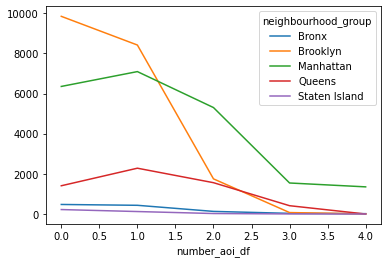

In [85]:
graph7 = pd.crosstab(index=[df['number_aoi_df']], columns= df['neighbourhood_group'])
graph7.plot()

We obtained similar results as the relation graph we did for the seperate houses. 

In [86]:
freq7 = pd.crosstab(index=[df['price'], df['number_aoi_df']], columns= df['neighbourhood_group'])
freq7

neighbourhood_group          Bronx  Brooklyn  Manhattan  Queens  Staten Island
price         number_aoi_df                                                   
a. 0-50       0.0              137      1457        208     253             57
              1.0              129      1096        350     475             25
              2.0               24       185        146     361              2
              3.0               18        10         13      68              1
              4.0                6         1          5       0              0
b. 51-100     0.0              228      4066       1482     679             94
              1.0              198      3384       2276    1103             53
              2.0               69       666       1106     747             15
              3.0                8        37        251     179              2
              4.0                6         2        199       0              0
c. 101-150    0.0               66      2026       1345     236             39
              1.0               63      1666       1551     368             24
              2.0               30       408       1155     251              2
              3.0                5        15        383     103              1
              4.0                3         3        290       0              0
d. 151-200    0.0               21      1182       1225     100             15
              1.0               20      1118       1199     183             10
              2.0                4       247       1061     115              2
              3.0                0         2        368      34              0
              4.0                2         0        292       0              0
e. 201-300    0.0                9       710       1203      88             15
              1.0               13       754       1015     109              4
              2.0                3       149       1062      61              1
              3.0                0         7        336      22              0
              4.0                1         0        305       0              0
f. 301-400    0.0                8       204        427      28              0
              1.0                5       213        323      22              3
              2.0                0        45        379      14              0
              3.0                1         0        101       4              0
              4.0                0         0        153       0              0
g. 401-500    0.0                3        70        162      10              1
              1.0                1        84        142       9              1
              2.0                0        17        160       6              0
              3.0                1         1         40       2              0
              4.0                0         0         43       0              0
h. 500-10.000 0.0                4       137        306      14              1
              1.0                5       107        242      14              3
              2.0                0        35        237       6              2
              3.0                0         0         54       2              0
              4.0                0         0         66       0              0

It was difficult to make a clear assumption by looking at this table since we have visualized more data than we did before so we could not make clear assumptions. However, because of the graph above we guessed that there would be no correlation again.

In [87]:
chi_stats7 = stats.chi2_contingency(freq7)
print ('Test t=%f p-value=%f' % (chi_stats7[0], chi_stats7[1]))
chi_stats7

Test t=13367.440579 p-value=0.000000


(13367.440578967067,
 0.0,
 156,
 array([[4.71253093e+01, 8.68384252e+02, 9.35638245e+02, 2.44740607e+02,
         1.61115861e+01],
        [4.62997239e+01, 8.53171081e+02, 9.19246856e+02, 2.40453012e+02,
         1.58293282e+01],
        [1.60208201e+01, 2.95217752e+02, 3.18081563e+02, 8.32025360e+01,
         5.47732897e+00],
        [2.45444319e+00, 4.52283465e+01, 4.87311586e+01, 1.27469066e+01,
         8.39145107e-01],
        [2.67757439e-01, 4.93400143e+00, 5.31612639e+00, 1.39057163e+00,
         9.15431026e-02],
        [1.46128623e+02, 2.69273128e+03, 2.90127598e+03, 7.58904469e+02,
         4.99596482e+01],
        [1.56504223e+02, 2.88392384e+03, 3.10727588e+03, 8.12789120e+02,
         5.35069435e+01],
        [5.80810512e+01, 1.07026714e+03, 1.15315642e+03, 3.01638163e+02,
         1.98572247e+01],
        [1.06433582e+01, 1.96126557e+02, 2.11316024e+02, 5.52752224e+01,
         3.63883833e+00],
        [4.61881583e+00, 8.51115247e+01, 9.17031803e+01, 2.39873607e+01,
   

In [88]:
critical_value7 = crit7 = stats.chi2.ppf( q = 1 - alpha,
                                     df= chi_stats7[2])
critical_value7

186.14575078141743

In [89]:
obs_chi_val7 = chi_stats7[0]
obs_chi_val7

13367.440578967067

In [113]:
if obs_chi_val7 <= critical_value7:
    print('Null hpothesis cannot be rejected!')
else:
    print('We reject null hypothesis!')

We reject null hypothesis!


By applying Chi 2 test, we can see that the p-value we obtained is a lot smaller than the threshold significance level 0.05, we can conclude that the number of AOIs in walking distance in neighbourhoods does not affect the prices. Here, we reject the null hypothesis which means that the alternative hypothesis is true and the number of AOIs in walking distance in neighbourhoods and prices have no correlation.

Although we guessed this outcome from the graph, we comfirmed our guess by applying the test.

# Conclusion

While doing our project we expected that at least one of the features we had observed would have correlation and we could comment on the effects of pricing of the Airbnb houses in New York. However none of our assumptions were true so we could not find a correlation between the prices and number of room types/number of subway stations in walking distance/ crimes in the neighbourhoods/number of subway stations in walking distance in each neighbourhood/ number of AOIs in walking distance/ number of AOIs in walking distance in each neighbourhood. So we do not know what exactly affects the pricing distribution in Airbnb houses in New York.